### Batch size 16 --> 32

## gdrive 연결

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Import library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import PIL.Image as pilimg
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

import random
import pickle
import cv2
import matplotlib

from glob import glob
from numpy import random
from PIL import Image
# gpu
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


## copy files and unzip

In [ ]:
!cp '/gdrive/MyDrive/CV4_Data/zoomin.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/zoomout.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/test_destroyed.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/test_sw_block.zip' ./
!cp '/gdrive/MyDrive/CV4_Data/test_zoomout.zip' ./

In [ ]:
!ls -al

total 343360
drwxr-xr-x 1 root root      4096 Aug 11 05:34 .
drwxr-xr-x 1 root root      4096 Aug 11 04:29 ..
-rw-r--r-- 1 root root   9388776 Aug 11 05:34 ae_0811_loss0.0046_batch_32.h5
drwxr-xr-x 4 root root      4096 Aug  3 20:20 .config
drwxr-xr-x 6 root root      4096 Aug 11 04:40 __MACOSX
drwxr-xr-x 2 root root      4096 Aug 10 11:56 r_destroyed
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
-rw------- 1 root root  22049986 Aug 11 04:40 test_destroyed.zip
drwxr-xr-x 2 root root      4096 Aug  8 11:33 test_sw_block
-rw------- 1 root root    391142 Aug 11 04:40 test_sw_block.zip
drwxr-xr-x 2 root root      4096 Aug  8 11:23 test_zoomout
-rw------- 1 root root    156194 Aug 11 04:40 test_zoomout.zip
drwxr-xr-x 2 root root    405504 Aug  5 17:04 zoomin
-rw------- 1 root root 161112367 Aug 11 04:40 zoomin.zip
-rw------- 1 root root 158032127 Aug 11 04:40 zoomout.zip


In [ ]:
!unzip zoomin.zip

In [ ]:
!unzip zoomout.zip

In [ ]:
!unzip test_destroyed.zip
!unzip test_sw_block.zip
!unzip test_zoomout.zip

## Data 가공

In [ ]:
zoomin_count = len(os.listdir('zoomin'))
zoomin_count

11311

In [ ]:
# zoomin
zoomin_tmp = glob('zoomin/*.jpg') + glob('zoomin/*.jpeg')
print(len(zoomin_tmp))

zoomin_list = []
for img in zoomin_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    a = 48
    h = 128
    crop_img = img[a: a + h, a: a + h]

    zoomin_list.append(crop_img)

zoomin_data = np.array(zoomin_list)
zoomin_data.shape

11311


(11311, 128, 128, 3)

In [ ]:
zoomin_train, zoomin_test = train_test_split(zoomin_data, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
# zoomout
zoomout_tmp = glob('zoomout/*.jpg') + glob('zoomout/*.jpeg')
print(len(zoomout_tmp))

zoomout_list = []
for img in zoomout_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    a = 48
    h = 128
    crop_img = img[a: a + h, a: a + h]

    zoomout_list.append(crop_img)

zoomout_data = np.array(zoomout_list)
zoomout_data.shape

10306


(10306, 128, 128, 3)

In [ ]:
zoomout_train, zoomout_test = train_test_split(zoomout_data, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
# test set
test_destroyed = glob('r_destroyed/*.jpeg') + glob('r_destroyed/*.jpg')
test_sw_block = glob('test_sw_block/*jpg') 
test_zoomout = glob('test_zoomout/*jpg')

print(len(test_destroyed))
print(len(test_sw_block))
print(len(test_zoomout))

38
10
10


In [ ]:
t_destroyed_list = []
t_sw_list = []
t_zoomout_list = []

for img in test_destroyed:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    a = 48
    h = 128
    crop_img = img[a: a + h, a: a + h]

    t_destroyed_list.append(crop_img)

for img in test_sw_block:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    a = 48
    h = 128
    crop_img = img[a: a + h, a: a + h]

    t_sw_list.append(crop_img)

for img in test_zoomout:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255
    a = 48
    h = 128
    crop_img = img[a: a + h, a: a + h]

    t_zoomout_list.append(crop_img)

test_destroyed_data = np.array(t_destroyed_list)
test_sw_block_data = np.array(t_sw_list)
test_zoomout_data = np.array(t_zoomout_list)

In [ ]:
print(test_destroyed_data.shape)
print(test_sw_block_data.shape)
print(test_zoomout_data.shape)

(38, 128, 128, 3)
(10, 128, 128, 3)
(10, 128, 128, 3)


## Model 만들기

In [ ]:
model = Sequential()

model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Dense(2))

model.add(Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(3, (1, 1), activation="sigmoid", padding="same"))

model.compile(optimizer='adam', loss='mse', metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

### learning model

In [ ]:
# zoomin, auto encoder : use model.fit(train_data, train_data, ....)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)
hist = model.fit(zoomin_train, zoomin_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
287/287 [==============================] - 22s 71ms/step - loss: 0.0145 - mae: 0.0904 - val_loss: 0.0091 - val_mae: 0.0705
Epoch 2/100
287/287 [==============================] - 20s 69ms/step - loss: 0.0086 - mae: 0.0688 - val_loss: 0.0066 - val_mae: 0.0594
Epoch 3/100
287/287 [==============================] - 20s 69ms/step - loss: 0.0063 - mae: 0.0567 - val_loss: 0.0063 - val_mae: 0.0577
Epoch 4/100
287/287 [==============================] - 20s 69ms/step - loss: 0.0060 - mae: 0.0552 - val_loss: 0.0057 - val_mae: 0.0538
Epoch 5/100
287/287 [==============================] - 20s 69ms/step - loss: 0.0058 - mae: 0.0546 - val_loss: 0.0057 - val_mae: 0.0537
Epoch 6/100
287/287 [==============================] - 20s 69ms/step - loss: 0.0057 - mae: 0.0537 - val_loss: 0.0055 - val_mae: 0.0529
Epoch 7/100
287/287 [==============================] - 20s 69ms/step - loss: 0.0057 - mae: 0.0537 - val_loss: 0.0055 - val_mae: 0.0526
Epoch 8/100
287/287 [==============================] - 

In [ ]:
model.save("ae_0811_loss0.0046_batch_32.h5")

## load model

In [ ]:
# load model
model = tf.keras.models.load_model('ae_0811_loss0.0046_batch_32.h5')

In [ ]:
# plot loss history
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 데이터 분석 

In [ ]:
reconstructed = model.predict(zoomin_train)

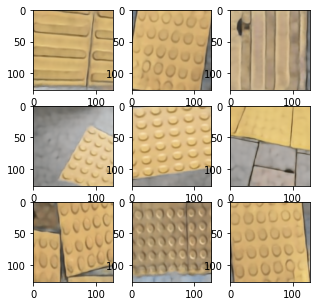

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(reconstructed[i].reshape((128,128,3)))

plt.show()

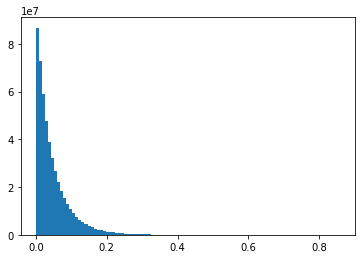

In [ ]:
diff = np.abs(reconstructed - zoomin_train)
plt.hist(diff.flatten(), bins=100)
plt.show()

In [ ]:
#test_destroyed 분포만 살펴보기기
reconstructed_des = model.predict(test_destroyed_data)

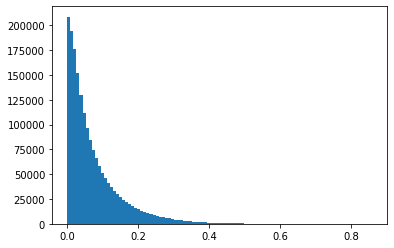

In [ ]:
diff_des = np.abs(reconstructed_des - test_destroyed_data)
plt.hist(diff_des.flatten(), bins=100)
plt.show()

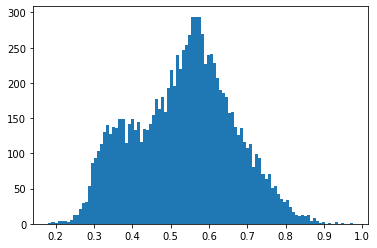

In [ ]:
# train
errors = []

for (image, recon) in zip(zoomin_train, reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = np.abs(image - recon)
  err = np.max(tmp) + np.mean(tmp)*2
  errors.append(err)

plt.hist(errors, bins=100)
plt.show()

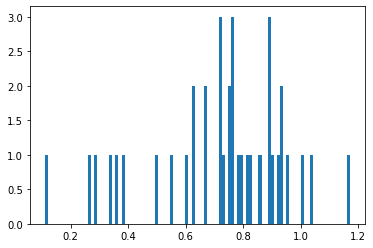

In [ ]:
# destroyed only
errors_destroy = []

for (image, recon) in zip(test_destroyed_data, reconstructed_des):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = np.abs(image - recon)
  err = np.max(tmp) + np.mean(tmp)*2
  errors_destroy.append(err)

plt.hist(errors_destroy, bins=100)
plt.show()

In [ ]:
threshold = np.quantile(errors, 0.995)

In [ ]:
test_data = np.concatenate((zoomin_test, test_destroyed_data, test_sw_block_data, test_zoomout_data), axis=0)
test_data.shape

(1190, 128, 128, 3)

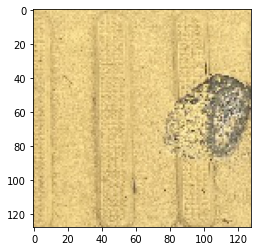

In [ ]:
plt.imshow(test_data[1150])

In [ ]:
reconstructed_test = model.predict(test_data)

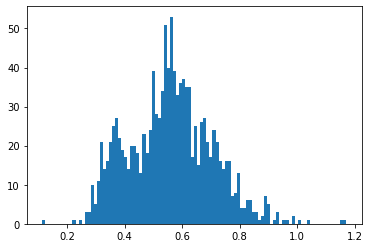

In [ ]:
# test
errors_test = []

for (image, recon) in zip(test_data, reconstructed_test):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
  tmp = np.abs(image - recon)
  err = np.max(tmp) + np.mean(tmp)*2
  errors_test.append(err)

plt.hist(errors_test, bins=100)
plt.show()

In [ ]:
anomaly_idxs = np.where(np.array(errors_test) >= threshold)[0]

In [ ]:
print(len(anomaly_idxs))

32


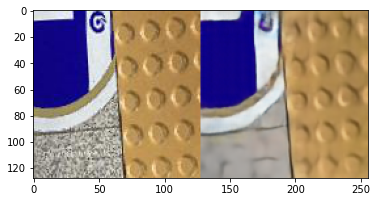

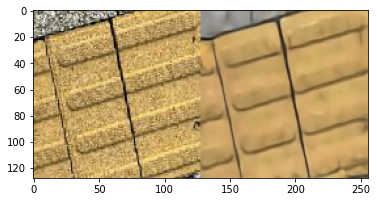

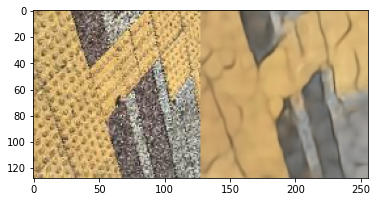

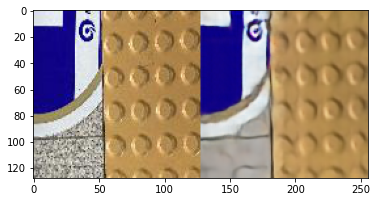

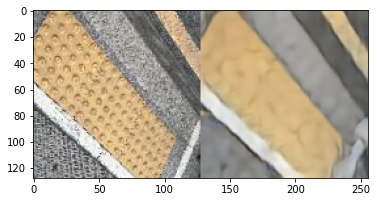

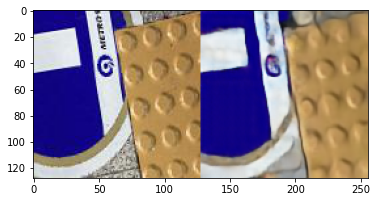

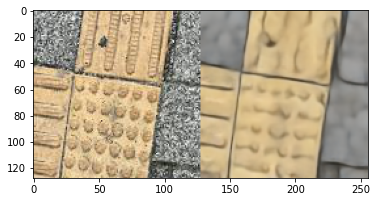

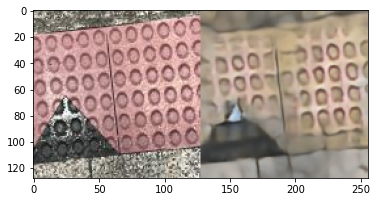

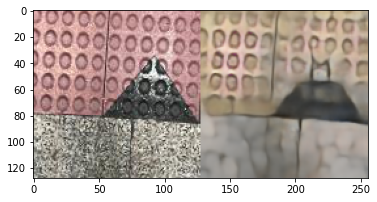

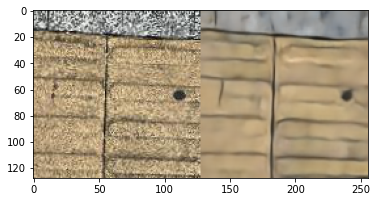

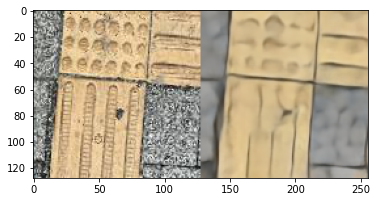

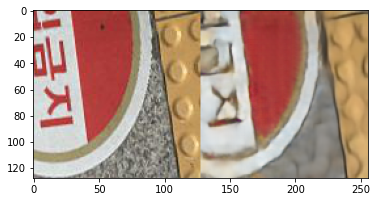

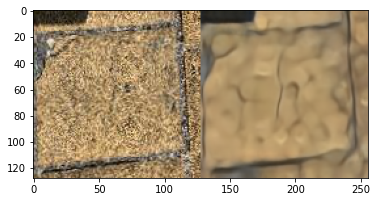

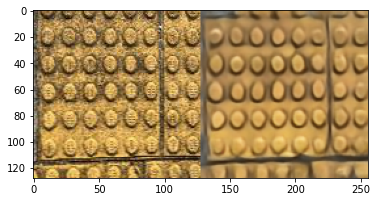

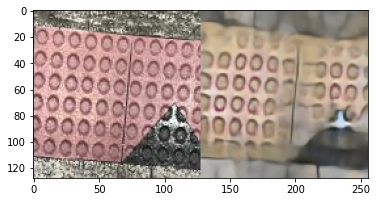

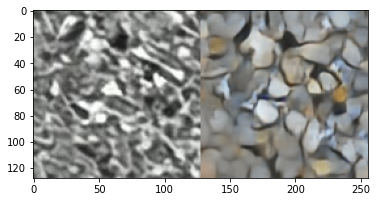

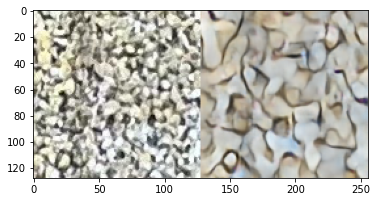

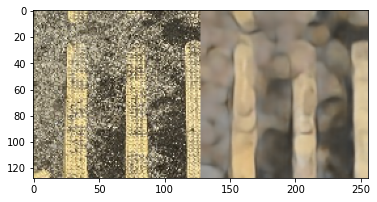

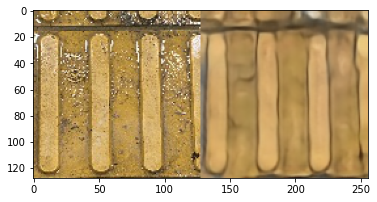

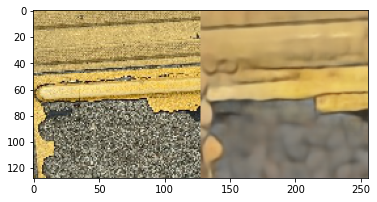

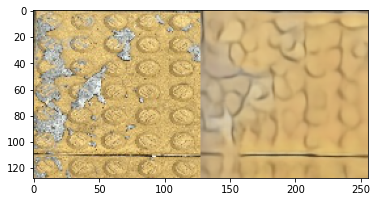

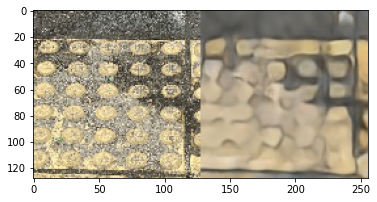

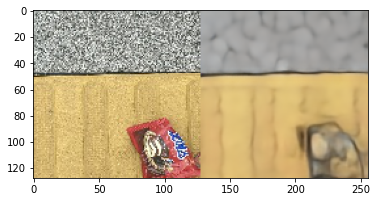

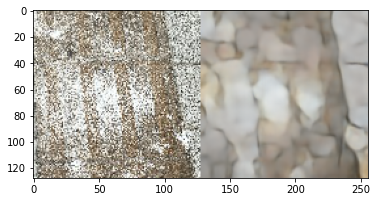

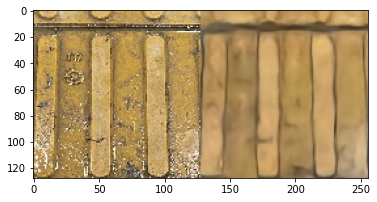

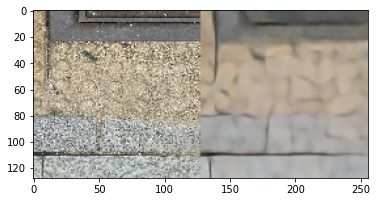

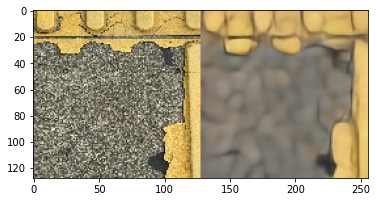

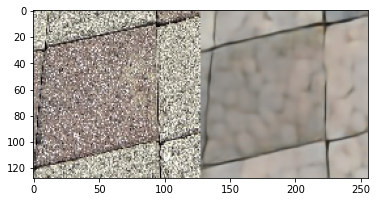

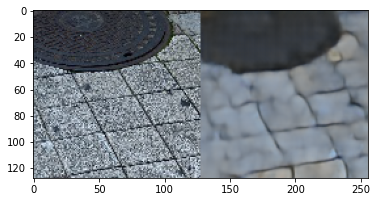

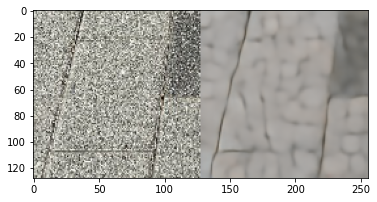

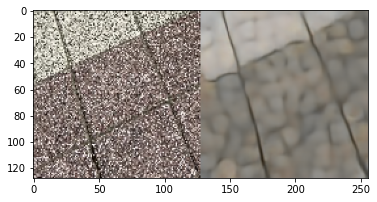

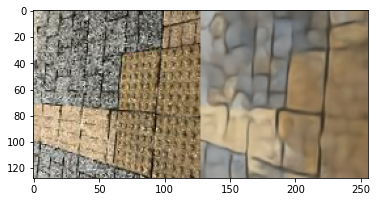

In [ ]:
for i in anomaly_idxs: 
  combined = np.hstack([test_data[i], reconstructed_test[i]])
  plt.imshow(combined.squeeze())
  plt.show()